In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [3]:
budget_sample = pd.read_csv('./budget-sample.csv')
bx_police = pd.read_csv('./BX-Police.csv')
iris = pd.read_csv('./Iris.csv')
sales = pd.read_csv('./Sales.csv')
stocks = pd.read_csv('./Stocks.csv')

### 1. Using Budget-Sample,  what percentage of total base salary is allocated to each borough? Which chart should you use and why? (you’re going to need a pivot table)

In [5]:
budget_sample.columns

Index(['fiscal_year', 'payroll_number', 'agency_name', 'last_name',
       'first_name', 'mid_init', 'agency_start_date', 'work_location_borough',
       'title_description', 'leave_status_as_of_june_30', 'base_salary',
       'pay_basis', 'regular_hours', 'regular_gross_paid', 'ot_hours',
       'total_ot_paid', 'total_other_pay'],
      dtype='object')

In [60]:
total_base_pay_grouped = budget_sample.groupby('work_location_borough', as_index=False).sum('base_salary')
total_base_pay_grouped.head()

,work_location_borough,fiscal_year,payroll_number,base_salary,regular_hours,regular_gross_paid,ot_hours,total_ot_paid,total_other_pay
0,BRONX,2199780,337171,7.254209e+07,1976838.18,6.640231e+07,240566.24,9907712.80,7854870.78
1,BROOKLYN,4284420,626109,1.466351e+08,3709511.20,1.294597e+08,463152.91,20243652.86,16337379.30
2,MANHATTAN,22387660,6680301,8.738778e+08,7008025.90,7.384763e+08,631452.26,29121970.27,74892226.16
3,QUEENS,4781340,888334,1.695746e+08,4150461.27,1.533762e+08,453452.63,20030066.08,15606713.15


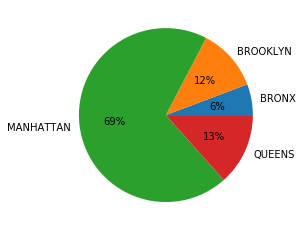

In [61]:
#boroughs = ['BRONX', 'BROOKLYN', 'MANHATTAN', 'QUEENS']
plt.pie(total_base_pay_grouped['base_salary'], labels=total_base_pay_grouped['work_location_borough'], autopct='%.0f%%')
plt.show()

### 2. Using Budget-Sample, make a chart displaying the 5 highest and 5 lowest average base salaries based on title_description. What are they? Why did you choose to use the chart that you did?  (you’re going to need a pivot table)

#### get 5 highest, 5 lowest, put them onto a bar chart

### 3. Using the BX-Police data, create a time series chart illustrating their average base salary over time (by fiscal_year).  What trend does this show?  (you’re going to need a pivot table)

In [17]:
bx_police.head()

,fiscal_year,payroll_number,agency_name,last_name,first_name,mid_init,agency_start_date,work_location_borough,title_description,leave_status_as_of_june_30,base_salary,pay_basis,regular_hours,regular_gross_paid,ot_hours,total_ot_paid,total_other_pay
0,2019,56.0,POLICE DEPARTMENT,GUZMAN,ALBERTO,NaN,07/05/2017,BRONX,POLICE OFFICER,ACTIVE,45000.0,per Annum,2040.00,43541.17,243.83,8597.10,3710.14
1,2015,NaN,POLICE DEPARTMENT,DERASMO,MARIELENA,NaN,07/06/2010,BRONX,POLICE OFFICER,ACTIVE,56609.0,per Annum,2085.72,54578.49,335.83,13344.33,4387.03
2,2018,56.0,POLICE DEPARTMENT,GARCES,MICHAEL,A,01/09/2013,BRONX,POLICE OFFICER,ACTIVE,63125.0,per Annum,2045.72,62809.14,145.00,7349.27,9801.34
3,2017,NaN,POLICE DEPARTMENT,ROSSI,THOMAS,C,01/06/2016,BRONX,POLICE OFFICER,ACTIVE,46805.0,per Annum,2051.43,49411.14,121.00,4213.27,6490.72
4,2019,56.0,POLICE DEPARTMENT,GARRETT,DENISE,NaN,05/30/2001,BRONX,SCHOOL SAFETY AGENT,ACTIVE,46737.0,per Annum,2040.00,46608.91,0.00,0.00,1202.56


In [21]:
bx_grouped = bx_police.groupby('fiscal_year', as_index=False ).mean('base_salary')

In [22]:
bx_grouped.head()

,fiscal_year,payroll_number,base_salary,regular_hours,regular_gross_paid,ot_hours,total_ot_paid,total_other_pay
0,2015,NaN,61299.402898,1968.227273,60316.627188,237.581023,12051.531761,8880.519858
1,2016,NaN,61601.310642,1964.351162,63311.521040,228.718165,12494.132171,9323.093456
2,2017,NaN,65231.981895,1945.976184,70180.858158,196.302605,12157.480053,9871.115658
3,2018,56.0,65147.201387,1963.620373,63991.954533,198.039333,11047.037387,8768.485147
4,2019,56.0,64427.547047,1903.762358,64052.372124,178.548756,10381.093290,8802.303187


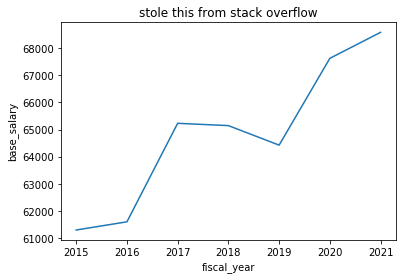

In [25]:
sns.lineplot(x='fiscal_year', y='base_salary', data=bx_grouped)
plt.title('stole this from stack overflow')
plt.show()

### 4. Using Budget-Sample, create a histogram of the base_salary column.  What does this tell you about the base salaries?

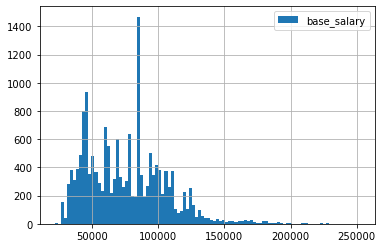

In [63]:
budget_sample['base_salary'].hist(bins=100, legend=True)

#### what we see is that most people don't make that much (<=115,000)

### 5. Using Stocks, tell me a story about the Google stock for the year. 

In [68]:
stocks.head()

,Date,Volume,High,Low,Open,Close,Adj Close,Ticker
0,2021-01-04,1901900,1760.650024,1707.849976,1757.540039,1728.239990,1728.239990,GOOG
1,2021-01-05,1145300,1747.670044,1718.015015,1725.000000,1740.920044,1740.920044,GOOG
2,2021-01-06,2602100,1748.000000,1699.000000,1702.630005,1735.290039,1735.290039,GOOG
3,2021-01-07,2265000,1788.400024,1737.050049,1740.060059,1787.250000,1787.250000,GOOG
4,2021-01-08,2050600,1809.839966,1773.535034,1787.979980,1807.209961,1807.209961,GOOG


In [79]:
import matplotlib.dates as md
import matplotlib.pyplot as plt

In [80]:
# get my custom date
stocks['my_date'] = pd.to_datetime(stocks['Date'], format = '%Y-%m-%d')

Text(0, 0.5, 'Volume')

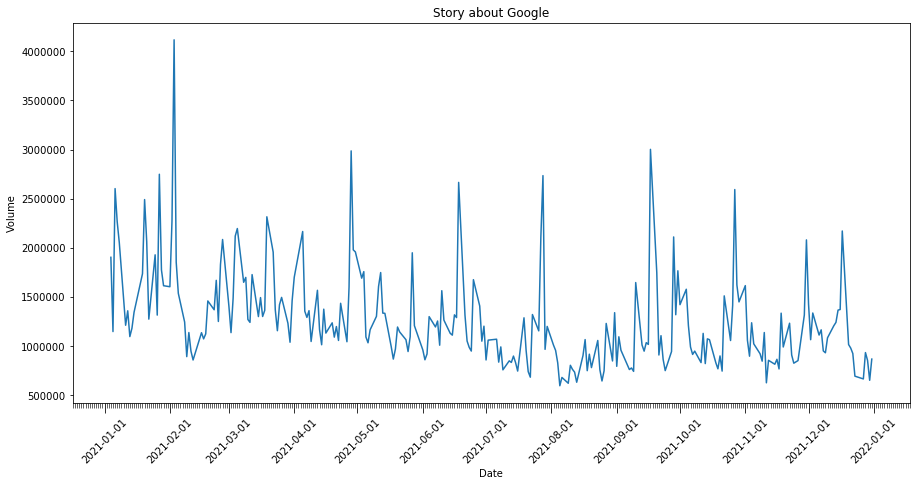

In [88]:
fig, ax = plt.subplots(figsize = (15, 7))
# set up the plot
sns.lineplot(ax = ax, x='my_date', y='Volume', data=stocks).set_title('Story about Google')

# specify the position of the major ticks at the beginning of the week
ax.xaxis.set_major_locator(md.MonthLocator(bymonthday= 1))
# specify the format of the labels as 'year-month-day'
ax.xaxis.set_major_formatter(md.DateFormatter('%Y-%m-%d'))
# (optional) rotate by 90° the labels in order to improve their spacing
plt.setp(ax.xaxis.get_majorticklabels(), rotation = 45)

# specify the position of the minor ticks at each day
ax.xaxis.set_minor_locator(md.DayLocator(interval = 1))

# set ticks length
ax.tick_params(axis = 'x', which = 'major', length = 10)
ax.tick_params(axis = 'x', which = 'minor', length = 5)

# set axes labels
plt.xlabel('Date')
plt.ylabel('Volume')

### 6. Using Iris, make a bubble chart of the petal length vs petal width and bubble color based on class.  What does this tell you about the different classes?

In [52]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


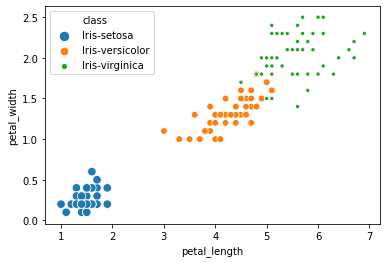

In [90]:
sns.scatterplot(data=iris, x='petal_length', y='petal_width', hue='class', size='class', legend='brief')

### 7. Using Sales, make a time series chart that shows the sales for each item over the past 12 months.  What does this tell you about the items.  Which item would you recommend they push more of and which item/s would you recommend they stop selling?

In [92]:
sales.head()

,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer
0,1,2500,1500,5200,9200,1200,1500
1,2,2630,1200,5100,6100,2100,1200
2,3,2140,1340,4550,9550,3550,1340
3,4,3400,1130,5870,8870,1870,1130
4,5,3600,1740,4560,7760,1560,1740
